# Measuring the number of Thank You's and Violence in PGH's Neighborhoods

## Introduction

We thought that the "best" neighborhood would be the one that you would have the nicest people.  To measure "niceness" we decided to look at all of the "Thank You" calls in the 311 data.  A nice neighborhood would have residents that don't just complain, and are thankful for the work that is put in to their neighborhood.  We also thought it would be important to look at how "mean" each neighborhood was looking at the "Engaged in fighting" reports on the police blotter.  The best neighborhood would be defined by picking the one that has the most amount of "niceness" for the least amount of "meanness."

## Import Data 
This data is brought to you by the WRDC and complaining people of Pittsburgh
(https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4) 

311 Complaints Data

In [33]:
import pandas as pd
data ="https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4"
complaints = pd.read_csv(data)
complaints.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
0,168714,2017-07-10T14:32:00,Fire Safety System Not Working,Control Panel,1,"Permits, Licenses and Inspections",Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-15,-79.980279,40.388412,APPROXIMATE
1,251339,2018-05-22T12:12:00,Illegal Dumping,Website,1,DOMI - Permits,Garfield,9.0,10.0,4.200310e+10,2.0,10.0,5.0,3-4,-79.938336,40.466358,APPROXIMATE
2,168709,2017-07-10T14:29:00,Potholes,Call Center,1,DPW - Street Maintenance,Polish Hill,7.0,6.0,4.200306e+10,6.0,6.0,2.0,2-6,-79.965908,40.457074,EXACT
3,168710,2017-07-10T14:30:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.033916,40.471775,APPROXIMATE
4,189977,2017-09-27T17:02:00,Manhole Cover,Call Center,0,DOMI - Permits,Central Business District,6.0,2.0,4.200302e+10,6.0,2.0,2.0,1-3,-80.000264,40.443240,EXACT


Crime Data

In [63]:
fightsData = "https://data.wprdc.org/datastore/dump/044f2016-1dfd-4ab0-bc1e-065da05fca2e"
fights = pd.read_csv(fightsData)
fights.head()


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,2868421,16202072.0,99,2016-10-26T04:00:00,"2000 Block Centre AV Pittsburgh, PA 15219",Y,Crawford-Roberts,2,NaN,9124 Drug Investigation,305.0,6.0,3.0,-79.979979,40.443581
1,2874934,16221357.0,99,2016-11-25T18:42:00,"Marne WY Pittsburgh, PA 15211",Y,Mount Washington,3,NaN,9999 Miscellaneous Report (No Crime),1914.0,7.0,2.0,-79.947030,40.463145
2,2881141,16239016.0,5,2016-12-25T02:24:00,"2200 Block Wilner DR Pittsburgh, PA 15221",N,Terrace Village,5,BURGLARY/FORCE ENT/RES,3502 Burglary.,510.0,9.0,2.0,-79.866830,40.453388
3,2822209,16062438.0,11,2016-04-07T11:30:00,"1100 Block Dagmar AV Pittsburgh, PA 15216",N,Beechview,6,IDENTITY THEFT,4120 Identity Theft,1916.0,4.0,5.0,-80.023186,40.417259
4,2844543,16131818.0,10,2016-07-16T00:27:00,"7500 Block Hamilton AV Pittsburgh, PA 15208",N,Homewood South,5,SIMPLE ASSAULT/INJURY,2702 Aggravated Assault.,1303.0,9.0,2.0,-79.892482,40.453422


---

## Seperate Data

We seperated removed the columns and within the "Request Type" column, and then within those requests seperated out all of the Thank You's

In [41]:
query_mask= complaints["REQUEST_TYPE"].str.contains("Thank You")
query_mask2= complaints["REQUEST_TYPE"].str.contains("Thank you")
thank_yous=complaints[query_mask | query_mask2]
thank_yous.head()

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
237,167723,2017-07-06T13:05:00,Thank you - DPW,Call Center,1,DPW - Administration,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,-80.005003,40.452160,APPROXIMATE
460,215010,2018-02-01T10:16:00,Thank you - DPW,Call Center,1,DPW - Administration,Brookline,4.0,32.0,4.200332e+10,5.0,32.0,6.0,4-25,-80.003637,40.392470,APPROXIMATE
631,285986,2018-09-05T12:28:00,Thank You - DOMI,Call Center,1,DOMIAdministration,Carrick,4.0,29.0,4.200329e+10,3.0,29.0,3.0,4-12,-79.982492,40.391539,APPROXIMATE
895,126883,2017-01-23T13:38:00,Thank You - 311,Call Center,1,311,Central Business District,6.0,2.0,4.200302e+10,6.0,2.0,2.0,1-4,-79.995981,40.439596,APPROXIMATE
2204,245954,2018-05-07T11:27:00,Thank You,Call Center,1,PCSC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUT_OF_BOUNDS


In [35]:
thank_yous["REQUEST_TYPE"].value_counts()


Thank you - DPW              599
Thank You - 311               60
Thank You - Police            50
Thank You                     49
Thank You - DOMI              22
Thank You - PWSA              19
Thank You - EMS               10
Thank You - PLI Personnel      9
Thank you - Finance            5
Thank You - CitiParks          2
Name: REQUEST_TYPE, dtype: int64

Now we seperated all of the crime data to just the offenses, and within those offenses seperated just the ones that were "engage in fighting."

In [40]:
query_mask = fights["OFFENSES"].str.contains("ENGAGE IN FIGHTING")
disorderly_conduct = fights[query_mask]
disorderly_conduct.head()


,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
497,2825919,16075496.0,10,2016-04-25T19:57:00,"700 Block Greenfield AV Pittsburgh, PA 15217",Y,Greenfield,4,HARRASSMENT/THREAT/ATTEMPT/PHY,601.12 Interference with Official Duties / 270...,1517.0,5.0,3.0,-79.938145,40.425036
873,2881901,16241009.0,14,2016-12-29T01:41:00,"1500 Block E Carson ST Pittsburgh, PA 15203",N,South Side Flats,3,CRIMINAL MISCHIEF (AUTO),3304 Criminal Mischief. / 5503(a)(1) DISORDERL...,1702.0,3.0,4.0,-79.983307,40.428685
889,2802339,16000077.0,23,2016-01-01T00:45:00,"1500 Block E Carson ST Pittsburgh, PA 15203",Y,South Side Flats,3,PUBLIC DRUNKENESS,5505 Public Drunkenness / 5503(a)(1) DISORDERL...,1702.0,3.0,4.0,-79.983307,40.428685
1215,2850465,16147138.0,10,2016-08-07T20:52:00,"Market ST & Liberty AV Pittsburgh, PA 15222",Y,Golden Triangle/Civic Arena,2,RESIST ARREST/OTHER LAW ENFORC,2702 Aggravated Assault. / 5104 Resisting Arre...,201.0,6.0,6.0,-80.001794,40.441924
1791,2882545,16237499.0,10,2016-12-16T13:17:00,"2400 Block SHADY AV PITTSBURGH, PA 15217",Y,Squirrel Hill South,4,RESIST ARREST/OTHER LAW ENFORC,5104 Resisting Arrest or Other Law Enforcement...,1408.0,5.0,3.0,-79.920634,40.430028



## Seperated by Neighborhood


#### The number of thank you's by neighborhood

In [36]:

thank_yous.groupby("NEIGHBORHOOD").size().sort_values(ascending=False)

NEIGHBORHOOD
Brookline                    37
Beechview                    35
Carrick                      32
Central Business District    30
Brighton Heights             25
Sheraden                     22
Greenfield                   21
Perry North                  21
Squirrel Hill South          19
South Side Slopes            16
South Side Flats             16
East Allegheny               15
Squirrel Hill North          15
Hazelwood                    15
Bloomfield                   14
Perry South                  14
Highland Park                13
Lincoln-Lemington-Belmar     12
Mount Washington             11
Crafton Heights              11
Morningside                  10
Stanton Heights              10
Shadyside                     9
East Liberty                  8
Marshall-Shadeland            8
Point Breeze                  8
Middle Hill                   8
Swisshelm Park                8
Allentown                     8
Spring Hill-City View         7
                           

In [37]:
thank_yous[thank_yous["NEIGHBORHOOD"]=="Lower Lawrenceville"]

,REQUEST_ID,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
276445,284983,2018-08-30T15:47:00,Thank You - 311,Call Center,1,311,Lower Lawrenceville,7.0,6.0,4.200306e+10,2.0,6.0,2.0,3-3,-79.965341,40.466466,APPROXIMATE


![lawrenceville](lawrencville.png)

#### Fighting by neighborhood

In [43]:
disorderly_conduct.groupby("INCIDENTNEIGHBORHOOD").size().sort_values(ascending=False)

INCIDENTNEIGHBORHOOD
South Side Flats               185
Central Business District       40
Golden Triangle/Civic Arena     24
North Shore                     21
Squirrel Hill South             20
Marshall-Shadeland              15
Shadyside                       15
East Liberty                    12
Carrick                         12
Mount Washington                11
Homewood North                  10
Sheraden                        10
Central Oakland                 10
Strip District                   9
Hazelwood                        9
Beechview                        9
Crawford-Roberts                 8
Perry North                      8
Upper Hill                       8
Bluff                            7
Greenfield                       7
Point Breeze                     7
Knoxville                        7
Central Lawrenceville            6
East Allegheny                   6
Homewood West                    6
Allegheny Center                 6
Perry South                      5


## Compaints per neighborhood

We sorted the total number of complaints for every neighborhood

In [24]:
complaints.groupby("NEIGHBORHOOD").size().sort_values(ascending=False)

NEIGHBORHOOD
Brookline                    11918
Carrick                      11309
Squirrel Hill South           9560
South Side Slopes             9420
South Side Flats              8735
Bloomfield                    7704
Mount Washington              7509
Beechview                     7072
Central Business District     6412
Shadyside                     6056
Greenfield                    5860
Central Lawrenceville         5666
Hazelwood                     5585
East Liberty                  5283
Lincoln-Lemington-Belmar      4818
Sheraden                      4803
Squirrel Hill North           4534
Knoxville                     4519
Garfield                      4324
Brighton Heights              4261
Marshall-Shadeland            4238
Highland Park                 4172
Overbrook                     4118
Stanton Heights               4047
Perry North                   3987
Elliott                       3910
East Allegheny                3861
Homewood North                3708
Perry S

#### **And then we divided the number of thank you's for every neighborhood to the repsective number of complaints for that neighborhood**

#### **To get our final number which we called our *Ratio of Kindness* **

In [29]:
rok=thank_yous.groupby("NEIGHBORHOOD").size()/complaints.groupby("NEIGHBORHOOD").size()
rok.sort_values(ascending=False)

NEIGHBORHOOD
Allegheny West               0.010118
Swisshelm Park               0.008850
Ridgemont                    0.008310
Chateau                      0.007435
Brighton Heights             0.005867
Glen Hazel                   0.005618
California-Kirkbride         0.005280
Perry North                  0.005267
St. Clair                    0.005025
Beechview                    0.004949
Central Business District    0.004679
Sheraden                     0.004580
Crafton Heights              0.004492
Fineview                     0.004147
Windgap                      0.003949
Perry South                  0.003915
East Allegheny               0.003885
Summer Hill                  0.003866
Spring Hill-City View        0.003700
Greenfield                   0.003584
Morningside                  0.003458
Banksville                   0.003413
Squirrel Hill North          0.003308
New Homestead                0.003145
Highland Park                0.003116
Brookline                    0.003105

#### We divide the number of fights by the number of complaints per neighborhood to get the Ratio of Meannness

In [44]:
rom = disorderly_conduct.groupby("INCIDENTNEIGHBORHOOD").size()/fights.groupby("INCIDENTNEIGHBORHOOD").size()
rom.sort_values(ascending = False)


INCIDENTNEIGHBORHOOD
South Side Flats               0.021049
Mount Oliver                   0.016667
North Shore                    0.012448
Upper Hill                     0.009768
Hays                           0.007937
Central Business District      0.007835
Strip District                 0.007341
Marshall-Shadeland             0.007163
Squirrel Hill South            0.006329
South Shore                    0.006276
Ridgemont                      0.006061
Crawford-Roberts               0.005622
Golden Triangle/Civic Arena    0.005610
Greenfield                     0.005538
Perry North                    0.005373
Spring Garden                  0.005305
Sheraden                       0.005040
Point Breeze                   0.004844
Central North Side             0.004817
Polish Hill                    0.004728
South Oakland                  0.004540
Chateau                        0.004499
Hazelwood                      0.004442
Banksville                     0.004431
Beechview          

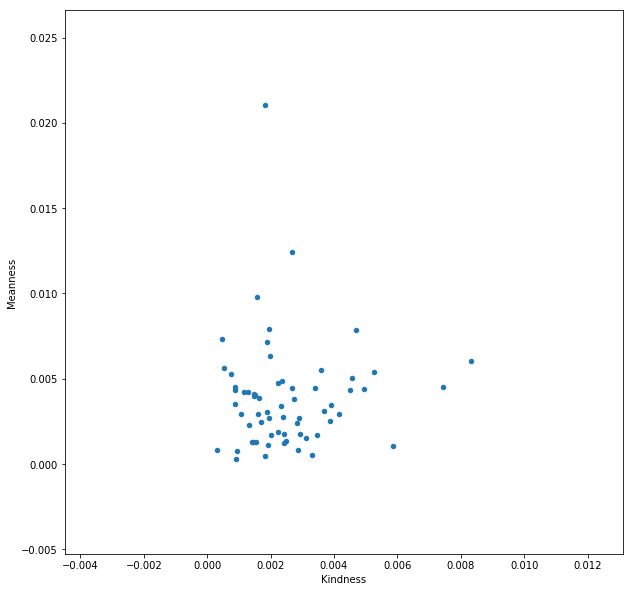

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
combined_data=pd.DataFrame({"Kindness": rok,
             "Meanness": rom})

combined_data.plot(kind="scatter", x="Kindness", y="Meanness", figsize=(10,10))
#combined_data.plot.hexbin(x="Kindness", y="Meanness", gridsize= 20);


In [98]:
combined_data.dropna()

,Kindness,Meanness
Allegheny Center,0.002732,0.003829
Allentown,0.002424,0.001251
Arlington,0.001893,0.003040
Banksville,0.003413,0.004431
Beechview,0.004949,0.004423
Beltzhoover,0.001962,0.002703
Bloomfield,0.001817,0.000460
Bluff,0.001168,0.004207
Bon Air,0.002245,0.001859
Brighton Heights,0.005867,0.001074


(-0.002, 0.025)

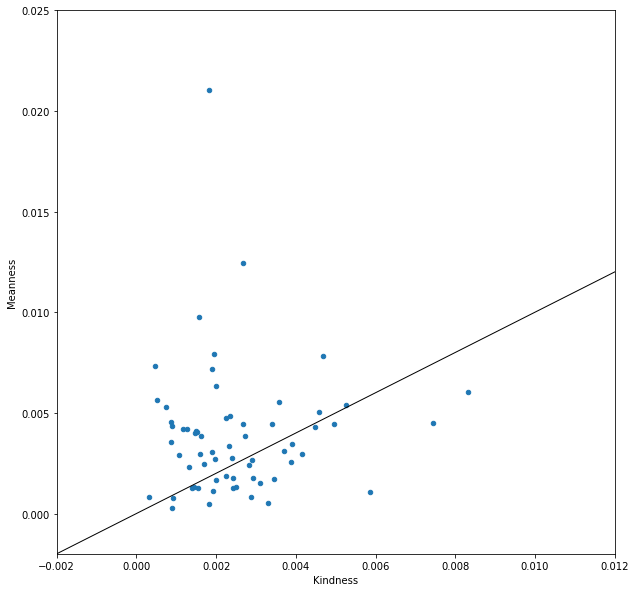

In [92]:
import matplotlib.pyplot as plt
ax=combined_data.plot(kind="scatter", x="Kindness", y="Meanness", figsize=(10,10))
plt.scatter(-.5, .02)
plt.plot([-.05, 1], [-.05, 1], color = 'black', linewidth = 1)
plt.xlim(-.002, 0.0120)
plt.ylim(-0.002, 0.025)




We looked at the kindness values in the combined data to find the point with the highest rok

In [105]:
combined_data.dropna()['Kindness'].sort_values(ascending=False).head(5)

Ridgemont           0.008310
Chateau             0.007435
Brighton Heights    0.005867
Perry North         0.005267
Beechview           0.004949
Name: Kindness, dtype: float64

Brighton Heights is the nicest neighborhood

We looked at the top values of rom in the graph

In [99]:
combined_data.dropna()['Meanness'].sort_values(ascending = False).head(3)

South Side Flats    0.021049
North Shore         0.012448
Upper Hill          0.009768
Name: Meanness, dtype: float64

Southside Flats is the meanest neighborhood... yikes.

In [116]:
combined_data["Kindness"].sort_values(ascending= False).head(-1)

Allegheny West                 0.010118
Swisshelm Park                 0.008850
Ridgemont                      0.008310
Chateau                        0.007435
Brighton Heights               0.005867
Glen Hazel                     0.005618
California-Kirkbride           0.005280
Perry North                    0.005267
St. Clair                      0.005025
Beechview                      0.004949
Central Business District      0.004679
Sheraden                       0.004580
Crafton Heights                0.004492
Fineview                       0.004147
Windgap                        0.003949
Perry South                    0.003915
East Allegheny                 0.003885
Summer Hill                    0.003866
Spring Hill-City View          0.003700
Greenfield                     0.003584
Morningside                    0.003458
Banksville                     0.003413
Squirrel Hill North            0.003308
New Homestead                  0.003145
Highland Park                  0.003116


## But technically Allegheny West is the nicest as it has the highest rok value, and NO rom...

![aw](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Alleghenywest.JPG/1200px-Alleghenywest.JPG)

# We hearby declare Allegheny west the best neighborhood in Pittsburgh!

# Reflections

## Deirdre

 Since I am fairly new to the Pittsburgh area, I wasn't very familiar with most of the neighborhoods.  That being said, I couldn't predict that SouthSide Flats would have the most amount of "engaged in fighting" reports, but after hearing about the type of area and the residents that live there (a bunch of bars and a bunch of young people), it makes a good amount of sense.  The same goes for Allegheny West; I had barely even heard of that neighborhood before so I had no idea that they would turn out to be the "nicest."  However, I think that it does make sense when looking at the characteristics of those neighborhoods in retrospect. I was a little disappointed to find out that Oakland wasn't one of the front runners for the nicest neighborhood, but I guess it does make sense considering that a bunch of stressed out college kids probably won't have that much time to make a 311 Thank You call because they are fixing a pothole.  

## Chloe

Going into this project, I hadn’t any predetermined notions of what the “best neighborhood” of Pittsburgh would be, or even really a personal opinion of what I would’ve wanted it to be. Being here for only a few moths so far though, I feel it’s reasonable to not have been able to draw my own conclusions about many of the neighborhoods just yet. Even until maybe halfway through this project, I was unaware that Pittsburgh had that many different districts to begin with. However, from other’s inputs about our final result, I feel as though we’ve come to a reasonable conclusion about the “nicest” region. Although we began our metric looking for data that we simply thought looked interesting, I feel as though our overall ratio led us to a valid conclusion.